<a href="https://colab.research.google.com/github/Gcango/Projecto_5/blob/main/Projecto_Analise_Cliente_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste exercício, buscamos aprimorar nossas habilidades na utilização da biblioteca Plotly Express para análise gráfica de variáveis em um dataset amplamente reconhecido: o de cancelamento de cartões de crédito. Antes de entrar na visualização dos dados, realizamos uma série de etapas preparatórias, incluindo a exploração do dataset, análise descritiva e estatísticas, perfil dos clientes, padrões de utilização do cartão de crédito, correlações entre as variáveis e segmentação dos clientes. Essas etapas visaram fornecer uma compreensão abrangente do conjunto de dados e preparar o terreno para uma análise visual mais detalhada.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
dados = pd.read_csv("/content/ClientesBanco.csv",encoding="latin1")

In [3]:
dados.head(3)

,CLIENTNUM,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,...,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,768805383,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,818770008,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,713982108,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000


In [4]:
print("O dataset tem linhas: ", dados.shape[0])
print("O dataset tem Colunas: ", dados.shape[1])

O dataset tem linhas:  10127
O dataset tem Colunas:  21


##Exploração dos dados do Dataset:
- Como estão constituidos?
- Existe Valores e faltantes?
- Como as colunas estão estruturadas?
- Quas tipos de Dados são mais vistosos?

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Categoria                      10127 non-null  object 
 2   Idade                          10127 non-null  int64  
 3   Sexo                           10127 non-null  object 
 4   Dependentes                    10127 non-null  int64  
 5   Educação                       10127 non-null  object 
 6   Estado Civil                   10127 non-null  object 
 7   Faixa Salarial Anual           10127 non-null  object 
 8   Categoria Cartão               10126 non-null  object 
 9   Meses como Cliente             10127 non-null  int64  
 10  Produtos Contratados           10127 non-null  int64  
 11  Inatividade 12m                10127 non-null  int64  
 12  Contatos 12m                   10127 non-null 

In [6]:
dados.dtypes

CLIENTNUM                          int64
Categoria                         object
Idade                              int64
Sexo                              object
Dependentes                        int64
Educação                          object
Estado Civil                      object
Faixa Salarial Anual              object
Categoria Cartão                  object
Meses como Cliente                 int64
Produtos Contratados               int64
Inatividade 12m                    int64
Contatos 12m                       int64
Limite                           float64
Limite Consumido                   int64
Limite Disponível                float64
Mudanças Transacoes_Q4_Q1        float64
Valor Transacoes 12m               int64
Qtde Transacoes 12m                int64
Mudança Qtde Transações_Q4_Q1    float64
Taxa de Utilização Cartão        float64
dtype: object

In [7]:
dados.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Columns: 21 entries, CLIENTNUM to Taxa de Utilização Cartão
dtypes: float64(5), int64(10), object(6)
memory usage: 1.6+ MB


In [8]:
dados.isna().sum()

CLIENTNUM                        0
Categoria                        0
Idade                            0
Sexo                             0
Dependentes                      0
Educação                         0
Estado Civil                     0
Faixa Salarial Anual             0
Categoria Cartão                 1
Meses como Cliente               0
Produtos Contratados             0
Inatividade 12m                  0
Contatos 12m                     0
Limite                           0
Limite Consumido                 0
Limite Disponível                0
Mudanças Transacoes_Q4_Q1        0
Valor Transacoes 12m             0
Qtde Transacoes 12m              0
Mudança Qtde Transações_Q4_Q1    0
Taxa de Utilização Cartão        0
dtype: int64

In [9]:
#Localizar o cliente com o dado faltante
dados[dados.isnull().any(axis=1)]

,CLIENTNUM,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,...,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
13,816082233,Cliente,35,M,3,Ensino Superior,Não informado,$60K - $80K,NaN,30,...,1,3,8547.0,1666,6881.0,1163.0,1311,33,2.0,0.195


In [10]:
#Subistituir o dado faltente pelo valor correspondente da Categoria Cartão
dados['Categoria Cartão'].fillna('Blue', inplace=True)

In [11]:
dados.isna().sum()

CLIENTNUM                        0
Categoria                        0
Idade                            0
Sexo                             0
Dependentes                      0
Educação                         0
Estado Civil                     0
Faixa Salarial Anual             0
Categoria Cartão                 0
Meses como Cliente               0
Produtos Contratados             0
Inatividade 12m                  0
Contatos 12m                     0
Limite                           0
Limite Consumido                 0
Limite Disponível                0
Mudanças Transacoes_Q4_Q1        0
Valor Transacoes 12m             0
Qtde Transacoes 12m              0
Mudança Qtde Transações_Q4_Q1    0
Taxa de Utilização Cartão        0
dtype: int64

In [12]:
#Resumir as colunas do dataset com valores unicos existente
for column in dados.columns:
    print(f"{column}: Number of unique values {dados[column].nunique()}")
    print("==========================================================")

CLIENTNUM: Number of unique values 10127
Categoria: Number of unique values 2
Idade: Number of unique values 45
Sexo: Number of unique values 2
Dependentes: Number of unique values 6
Educação: Number of unique values 7
Estado Civil: Number of unique values 4
Faixa Salarial Anual: Number of unique values 6
Categoria Cartão: Number of unique values 4
Meses como Cliente: Number of unique values 44
Produtos Contratados: Number of unique values 6
Inatividade 12m: Number of unique values 7
Contatos 12m: Number of unique values 7
Limite: Number of unique values 6205
Limite Consumido: Number of unique values 1974
Limite Disponível: Number of unique values 6813
Mudanças Transacoes_Q4_Q1: Number of unique values 1158
Valor Transacoes 12m: Number of unique values 5033
Qtde Transacoes 12m: Number of unique values 126
Mudança Qtde Transações_Q4_Q1: Number of unique values 830
Taxa de Utilização Cartão: Number of unique values 964


##Analise Descritiva e estatísticas do dataset:
- Descrição geral;
- Desvio padrão;
- Valores minimos
- Valores máximos

In [13]:
dados.head(3)

,CLIENTNUM,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,...,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,768805383,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,818770008,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,713982108,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000


In [14]:
dados.describe()

,CLIENTNUM,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,108.817273,4404.086304,64.858695,66.573618,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,354.050357,3397.129254,23.472570,283.988065,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3397.000000,18484.000000,139.000000,3714.000000,0.999000


In [15]:
data_est = dados.describe()

In [16]:
data_est.loc['std'] = data_est.std()
data_est.loc['min'] = data_est.min()
data_est.loc['max'] = data_est.max()

In [17]:
data_est = data_est.T

In [18]:
print(round(data_est,2))

                                 count          mean           std      min  \
CLIENTNUM                      10127.0  7.391776e+08  3.395128e+08  10127.0   
Idade                          10127.0  4.633000e+01  3.565720e+03     26.0   
Dependentes                    10127.0  2.350000e+00  3.579700e+03      0.0   
Meses como Cliente             10127.0  3.593000e+01  3.569360e+03     13.0   
Produtos Contratados           10127.0  3.810000e+00  3.579200e+03      1.0   
Inatividade 12m                10127.0  2.340000e+00  3.579610e+03      0.0   
Contatos 12m                   10127.0  2.460000e+00  3.579600e+03      0.0   
Limite                         10127.0  8.631950e+03  1.043927e+04   1438.3   
Limite Consumido               10127.0  1.162810e+03  3.276840e+03      0.0   
Limite Disponível              10127.0  7.469140e+03  1.084933e+04      3.0   
Mudanças Transacoes_Q4_Q1      10127.0  1.088200e+02  3.581120e+03      0.0   
Valor Transacoes 12m           10127.0  4.404090e+03

##Analise de Correlações do dataset:
- Calculo da matriz de correlação entre as variáveis numéricas para entender as relações entre elas.

In [19]:
dados_1 = dados.drop(['CLIENTNUM'], axis=1)

In [20]:
dados_1.sample(3)

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
2361,Cliente,65,F,1,Sem ensino formal,Solteiro,Não informado,Blue,51,3,3,5,11037.0,1491,9546.0,0.651,2429,63,0.750,0.135
8607,Cliente,44,F,4,Ensino Médio,Solteiro,$40K - $60K,Blue,36,3,2,2,2055.0,0,2055.0,0.975,7674,80,0.633,0.000
8597,Cliente,42,M,1,Ensino Superior,Não informado,$80K - $120K,Blue,36,2,1,2,4765.0,1516,3249.0,0.709,7380,76,0.689,0.318


In [21]:
#Selecionar exclusivamente valores numericos no dataset
dados_numericos = dados_1.select_dtypes(include='number')

In [22]:
matrix_correlacao = dados_numericos.corr()

In [23]:
matrix_correlacao

,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
Idade,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.025051,-0.046446,-0.067097,0.021766,0.007114
Dependentes,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.046238,0.025046,0.049912,0.017027,-0.037135
Meses como Cliente,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.027773,-0.038591,-0.049819,0.010530,-0.007541
Produtos Contratados,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.069629,-0.347229,-0.241891,0.043470,0.067663
Inatividade 12m,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.028788,-0.036982,-0.042787,-0.012792,-0.007503
Contatos 12m,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,0.020555,-0.112774,-0.152213,-0.029030,-0.055471
Limite,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.011528,0.171730,0.075927,0.003730,-0.482965
Limite Consumido,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.040203,0.064370,0.056060,0.043810,0.624022
Limite Disponível,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007922,0.165923,0.070885,-0.000198,-0.538808
Mudanças Transacoes_Q4_Q1,-0.025051,-0.046238,-0.027773,0.069629,-0.028788,0.020555,0.011528,0.040203,0.007922,1.000000,-0.111633,-0.166078,0.190536,0.012415


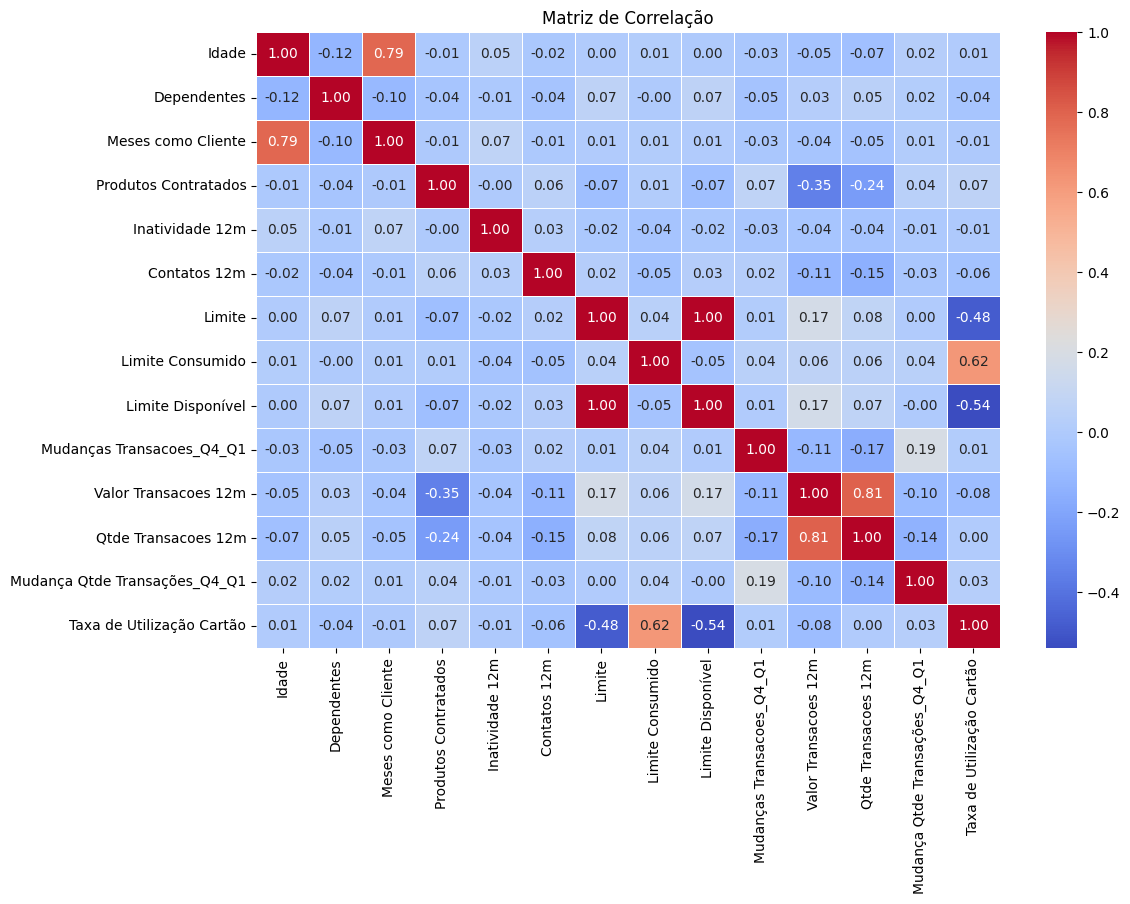

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

##Análise de perfil dos clientes:
- Vai consistir na exploração de como as características demográficas (idade, sexo, educação, estado civil) se relacionam com o comportamento do cliente e seus padrões de transação. Isso nos ajuda a entender melhor o público-alvo e personalizar as ofertas de produtos/serviços.



In [25]:
dados_1.sample(3)

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
8250,Cliente,53,M,4,Ensino Superior,Casado,$120K +,Blue,40,1,1,3,6383.0,1512,4871.0,0.558,4985,87,0.776,0.237
2393,Cliente,53,F,1,Doutorado,Solteiro,Less than $40K,Blue,48,4,3,3,2267.0,1469,798.0,0.716,3709,64,0.684,0.648
6775,Cliente,41,F,4,Sem ensino formal,Casado,Less than $40K,Blue,36,3,5,1,1438.3,1055,383.3,0.809,4532,78,0.472,0.734


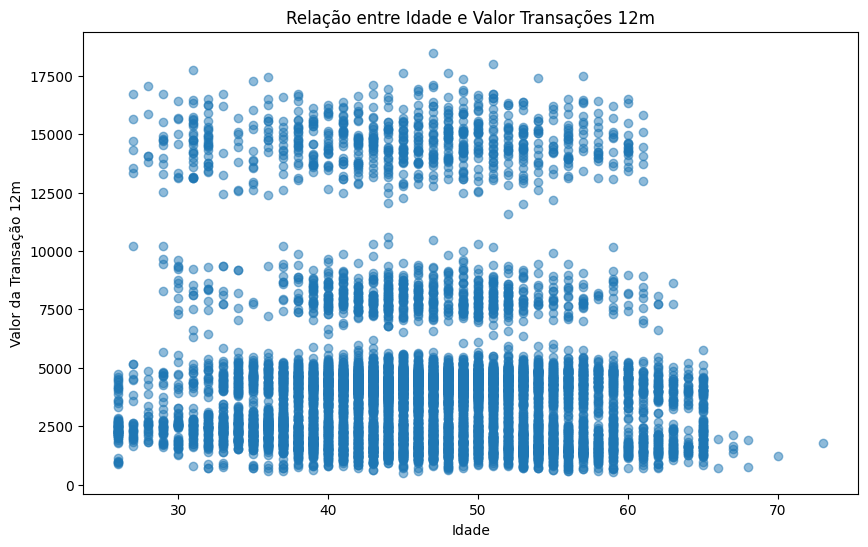

In [26]:
#Relação entre idade e comportamento dos clientes:

plt.figure(figsize=(10,6))
plt.scatter(dados_1["Idade"], dados_1['Valor Transacoes 12m'], alpha=0.5)
plt.title("Relação entre Idade e Valor Transações 12m")
plt.xlabel('Idade')
plt.ylabel("Valor da Transação 12m")
plt.show()

In [27]:
idade_cli = dados_1['Idade'].describe()

In [28]:
print("Estatísticas descritiva para a variavel idade:")
print(idade_cli)

Estatísticas descritiva para a variavel idade:
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Idade, dtype: float64


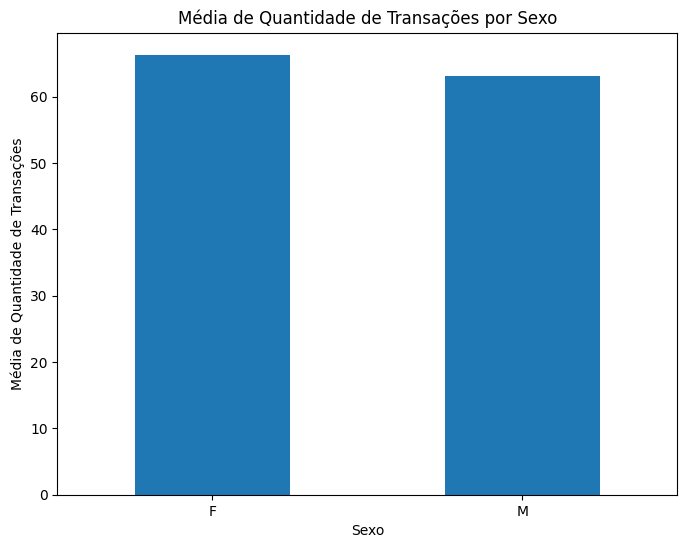

In [29]:
# Relação entre sexo e número de transações

plt.figure(figsize=(8,6))
dados_1.groupby('Sexo')["Qtde Transacoes 12m"].mean().plot(kind='bar')
plt.title("Média de Quantidade de Transações por Sexo")
plt.xlabel('Sexo')
plt.ylabel('Média de Quantidade de Transações')
plt.xticks(rotation=0)
plt.show()

In [30]:
#Representação Númerica da "Média de Quantidade de Transações por Sexo"

In [31]:
media_ts = dados_1.groupby('Sexo')['Qtde Transacoes 12m'].mean()

In [32]:
print("Média de Transações por Sexo: ")
print(media_ts)

Média de Transações por Sexo: 
Sexo
F    66.352370
M    63.180541
Name: Qtde Transacoes 12m, dtype: float64


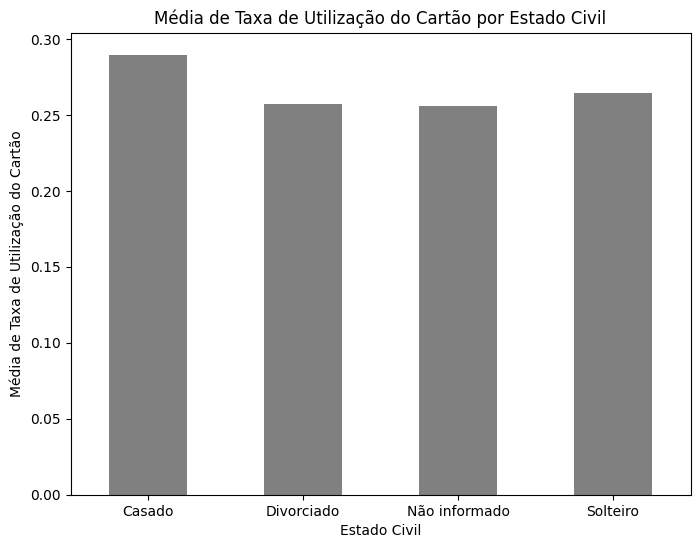

In [33]:
# Relação entre estado civil e taxa de utilização do cartão

plt.figure(figsize=(8, 6))
dados_1.groupby('Estado Civil')['Taxa de Utilização Cartão'].mean().plot(kind='bar', color='gray')
plt.title('Média de Taxa de Utilização do Cartão por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Média de Taxa de Utilização do Cartão')
plt.xticks(rotation=0)
plt.show()

In [34]:
#Representação Númerica da "Média de Taxa de Utilização do Cartão por Estado Civil"

In [35]:
media_tec = dados_1.groupby('Estado Civil')['Taxa de Utilização Cartão'].count()

In [36]:
print("Média de taxa de utilização do cartão por estado civil:")
print(media_tec)

Média de taxa de utilização do cartão por estado civil:
Estado Civil
Casado           4687
Divorciado        748
Não informado     749
Solteiro         3943
Name: Taxa de Utilização Cartão, dtype: int64


##Análise de utilização do cartão de crédito:

Nesta análise da taxa de utilização do cartão de crédito em relação a diferentes variáveis, será usada  agregações de dados para calcular a média da taxa de utilização para cada categoria das variáveis de interesse.

In [37]:
# Média da taxa de utilização do cartão de crédito para cada categoria de variáveis de interesse

In [38]:
media_tufs = dados_1.groupby('Faixa Salarial Anual')['Taxa de Utilização Cartão'].mean()

In [39]:
print("Média da taxa de utilização do cartão de crédito por faixa salarial: ")
print(media_tufs)

Média da taxa de utilização do cartão de crédito por faixa salarial: 
Faixa Salarial Anual
$120K +           0.125307
$40K - $60K       0.316561
$60K - $80K       0.206075
$80K - $120K      0.161664
Less than $40K    0.377280
Não informado     0.220810
Name: Taxa de Utilização Cartão, dtype: float64


In [40]:
#Média da taxa de utilização do cartão de crédito por idade

In [41]:
media_tu_idade = dados_1.groupby('Idade')['Taxa de Utilização Cartão'].mean()

In [42]:
print("Média da taxa de utilização do cartão de crédito por idade: ")
print(media_tu_idade)

Média da taxa de utilização do cartão de crédito por idade: 
Idade
26    0.388321
27    0.358906
28    0.227379
29    0.266107
30    0.261714
31    0.252308
32    0.296368
33    0.296551
34    0.314527
35    0.310370
36    0.322991
37    0.293742
38    0.269752
39    0.280048
40    0.270773
41    0.248121
42    0.272174
43    0.255658
44    0.233332
45    0.280195
46    0.247406
47    0.262194
48    0.257199
49    0.249562
50    0.254115
51    0.252497
52    0.290971
53    0.295496
54    0.301945
55    0.288538
56    0.275920
57    0.288883
58    0.317662
59    0.297815
60    0.325961
61    0.307108
62    0.262312
63    0.295523
64    0.365116
65    0.319119
66    0.382000
67    0.456000
68    0.372500
70    0.460000
73    0.252000
Name: Taxa de Utilização Cartão, dtype: float64


In [43]:
faixas_etaria = pd.cut(dados['Idade'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61-100'])
contingencia_idade = pd.crosstab(dados_1['Valor Transacoes 12m'], faixas_etaria, normalize='index')
print("Tabela de contingência entre Idade e o Valor Transacoes 12m :")
contingencia_idade.sample(20)

Tabela de contingência entre Idade e o Valor Transacoes 12m :


Idade,19-30,31-45,46-60,61-100
Valor Transacoes 12m,,,,
14585,0.0,0.000000,1.000000,0.00
973,0.0,0.000000,1.000000,0.00
4229,0.0,0.000000,1.000000,0.00
4496,0.0,0.800000,0.200000,0.00
14134,0.0,1.000000,0.000000,0.00
1449,0.0,0.000000,0.000000,1.00
2867,0.0,1.000000,0.000000,0.00
982,1.0,0.000000,0.000000,0.00
5110,0.0,0.333333,0.666667,0.00


In [44]:
#Formação Académica dos Clientes

In [45]:
dados_1['Educação'].value_counts()

Educação
Ensino Superior               3128
Ensino Médio                  2013
Não informado                 1519
Sem ensino formal             1487
Ensino Superior Incompleto    1013
Post-Ensino Superior           516
Doutorado                      451
Name: count, dtype: int64

In [46]:
frequencia_grau = dados_1['Educação'].value_counts()
print("Análise do Grau Acdémico dos Clientes:")
print("Boa parte dos clientes têm o:", frequencia_grau.idxmax())

Análise do Grau Acdémico dos Clientes:
Boa parte dos clientes têm o: Ensino Superior


In [47]:
dados_1['Dependentes'].value_counts()

Dependentes
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64

In [48]:
frequencia_dep = dados_1['Dependentes'].value_counts()
print("Análise do Grau do Numero de Dependentes:")
print("Boa parte dos clientes têm o tatal de dependentes:", frequencia_dep.idxmax())

Análise do Grau do Numero de Dependentes:
Boa parte dos clientes têm o tatal de dependentes: 3


In [49]:
contingencia_estado_civil_procedimento = pd.crosstab(dados_1['Limite'], dados['Estado Civil'])
print("Distribuição dos procedimentos por estado civil:")
contingencia_estado_civil_procedimento.sample(30)

Distribuição dos procedimentos por estado civil:


Estado Civil,Casado,Divorciado,Não informado,Solteiro
Limite,,,,
2247.0,1,0,0,1
6797.0,1,0,0,1
2153.0,1,0,0,1
25197.0,1,0,0,0
21615.0,0,1,0,0
5843.0,2,0,0,0
5693.0,1,0,0,0
14546.0,0,0,0,1
1977.0,1,0,0,1


In [50]:
dados_1.columns

Index(['Categoria', 'Idade', 'Sexo', 'Dependentes', 'Educação', 'Estado Civil',
       'Faixa Salarial Anual', 'Categoria Cartão', 'Meses como Cliente',
       'Produtos Contratados', 'Inatividade 12m', 'Contatos 12m', 'Limite',
       'Limite Consumido', 'Limite Disponível', 'Mudanças Transacoes_Q4_Q1',
       'Valor Transacoes 12m', 'Qtde Transacoes 12m',
       'Mudança Qtde Transações_Q4_Q1', 'Taxa de Utilização Cartão'],
      dtype='object')

##Análise de segmentação de clientes:

Nesta análise de segmentação de clientes usamos o algoritmo K-means, que permite segmentar os clientes com base nas variáveis de idade e valor das transações. No entanto, escolhemos outras variáveis mais relevantes para este caso específico. O número de clusters é escolhido usando o método Elbow, que é uma heurística comum para determinar o número ideal de clusters. Depois de aplicar o K-means, adicionamos as informações de cluster de volta ao dataframe original e visualizamos as características médias de cada cluster.



In [51]:
x = dados_1[['Idade','Valor Transacoes 12m']]

In [52]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

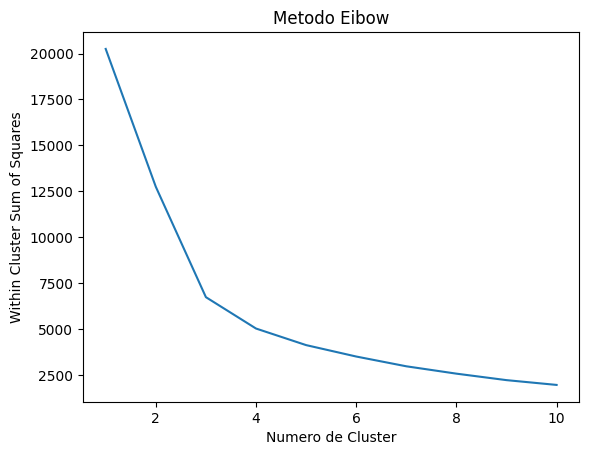

In [54]:
plt.plot(range(1,11), wcss)
plt.title("Metodo Eibow")
plt.xlabel("Numero de Cluster")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

In [55]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x_scaled)

dados_1['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
dados_1.sample(5)

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,...,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão,Cluster
4850,Cancelado,49,F,2,Ensino Superior,Não informado,Less than $40K,Blue,29,6,...,3,2520.0,1473,1047.0,0.515,2061,36,0.241,0.585,0
10005,Cliente,43,M,5,Ensino Superior,Casado,$120K +,Blue,36,6,...,4,22355.0,2179,20176.0,0.726,14268,99,0.800,0.097,2
5742,Cliente,61,F,1,Ensino Superior Incompleto,Casado,Não informado,Blue,46,6,...,2,5686.0,0,5686.0,1027.000,4338,67,0.675,0.000,0
5271,Cliente,46,F,2,Ensino Superior,Não informado,Less than $40K,Blue,39,5,...,2,3003.0,1454,1549.0,0.595,4378,96,0.548,0.484,1
5423,Cliente,52,F,1,Não informado,Casado,$40K - $60K,Blue,45,5,...,1,1611.0,938,673.0,0.601,4087,86,0.911,0.582,0


In [57]:
dados_1['Cluster'].unique()

array([1, 0, 2], dtype=int32)

In [58]:
dados_1.columns

Index(['Categoria', 'Idade', 'Sexo', 'Dependentes', 'Educação', 'Estado Civil',
       'Faixa Salarial Anual', 'Categoria Cartão', 'Meses como Cliente',
       'Produtos Contratados', 'Inatividade 12m', 'Contatos 12m', 'Limite',
       'Limite Consumido', 'Limite Disponível', 'Mudanças Transacoes_Q4_Q1',
       'Valor Transacoes 12m', 'Qtde Transacoes 12m',
       'Mudança Qtde Transações_Q4_Q1', 'Taxa de Utilização Cartão',
       'Cluster'],
      dtype='object')

##Analise Grafica das Varaiveis.
Esta analise busca perceber o minimo dos padrões dos clientes de cancelaram os serviços.


In [61]:
for coluna in dados:
  grafico = px.histogram(dados, x=coluna, color="Categoria")
  grafico.show()